In [50]:
# Michaela Webster's Thesis Project #
""" This project aims to try to predict the outcome of security clearance appeals cases """

#use this link for scikit learn help: https://www.ritchieng.com/pandas-scikit-learn/

# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# imports
import os
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import numpy as np
import subprocess
import shlex
import sklearn
from sklearn import metrics as skmet

In [51]:
#open alcohol_query.csv as pandas dataframe - encoding must be latin-1
path_to_file = "C:\\Users\\maweb\\Documents\\ThesisCode\\alcohol_query.csv"
data = pd.read_csv(path_to_file, encoding='latin-1')

df = data.groupby(['Alcohol', 'Denied']).size()
#print bar graph of alcohol yes/no vs denied yes/no
print (df)

Alcohol  Denied
False    False     8885
         True      9764
True     False      767
         True      1098
dtype: int64


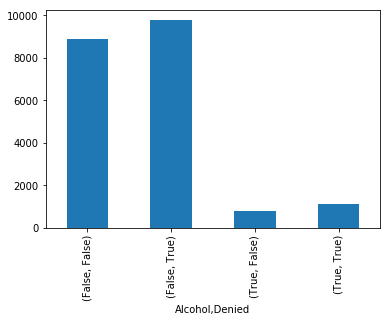

In [52]:
#print bar graph to show alcohol/denied
#cannot do this through cmd
df.plot.bar()

alcohol abuse:  328
alcohol dependence:  65
rehab:  372


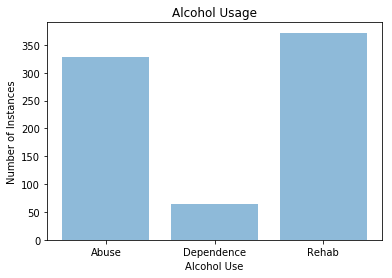

In [53]:
#print out the count for alcohol usage
data.Judgment.head(3)
#sort through the judgment field
alcohol_abuse = 0
alcohol_dependence = 0
rehab = 0

#go through each row 
for i in data['Judgment']:
        if 'alcohol abuse' in i:
            alcohol_abuse = alcohol_abuse+1
        elif 'alcohol dependence' in i:
            alcohol_dependence = alcohol_dependence+1
        elif 'rehab' in i:
            rehab = rehab+1

print('alcohol abuse: ', alcohol_abuse)
print('alcohol dependence: ', alcohol_dependence)
print('rehab: ', rehab)

x=['Abuse', 'Dependence', 'Rehab']
y=[alcohol_abuse, alcohol_dependence, rehab]

plt.bar(x, y, align='center', alpha=0.5)
plt.xticks(x)
plt.xlabel('Alcohol Use')
plt.ylabel('Number of Instances')
plt.title('Alcohol Usage')
 
plt.show()

In [54]:
# set the featured columns for X (Alcohol)
feature_cols = ['Alcohol']
# you want all rows, and the feature_cols' columns
X = data.loc[:, feature_cols]
# now we want to create our response vector
y = data.Denied

In [55]:
# START DOING MACHINE LEARNING STUFF
# 1. import
from sklearn.linear_model import LogisticRegression
# 2. instantiate model
logreg = LogisticRegression(penalty='l1',dual=False,max_iter=110, solver='liblinear')
# 3. fit 
logreg.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=110, multi_class='warn',
          n_jobs=None, penalty='l1', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

In [56]:
# FOR TEST DATA
#open alcohol_test.csv as pandas dataframe
path_to_file = "C:\\Users\\maweb\\Documents\\ThesisCode\\alcohol_test.csv"
data2 = pd.read_csv(path_to_file, encoding='latin-1')
X_new = data.loc[:, feature_cols]
new_pred_class = logreg.predict(X_new)

In [57]:
new_pred_class

array([ True,  True,  True, ...,  True,  True,  True])

In [58]:
alcohol_accuracy = skmet.accuracy_score(new_pred_class, y)

In [59]:
print('Accuracy Score for Alcohol model: ',alcohol_accuracy)

Accuracy Score for Alcohol model:  0.5294920542068831
